**Материалы**

Презентация: https://drive.google.com/file/d/1mbeNKjJ91FL4MAgXKvVQitBTxvvq_fwG/view?usp=share_link

Дашборд:  https://public.tableau.com/app/profile/ann.bocs/viz/Book1_16844830985490/Dashboard1?publish=yes

**Название исследования:** Банк «Метанпром»: анализ оттока клиентов.

Настоящее исследование представляет собой анализ клиентов банка "Метанпром", их сегментирование и проверку гипотез.
Датасет содержит данные о клиентах банка. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Цели исследования:**
1. Провести анализ клиентов банка
2. Выделить сегменты, которые склонны уходить
3. Сформировать портреты: действующие и ушедшие клиенты
4. Сформулировать и проверить статистические гипотезы
- Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались
- Проверить гипотезу различия баланса счета между теми клиентами, которые ушли и теми, которые остались

**Ход исследования**

Данные о бановских показателях я получу их файла https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F. О качестве данных ничего не известно. Поэтому прежде чем приступить непосредственно к целям исследования, необходимо получить общее представление о данных, подготовить их к анализу. 
Далее проведу проверку данных на ошибки, оценю влияние этих ошибок. Затем, на этапе предбработки, постараюсь найти возможность исправить ошибки данных, при этом не искажая конечный результат.
Далее проведу исследовательский анализ данных.

Таким образом, исследование пройдет в 8 этапов:

1. Изучение общей информацию о данных;
2. Предобработка данных;
3. Рассчеты и категоризация данных;
4. Исследование каждого показателя в разрезе действующий/ушедший клиент;
5. Составление портретов действующих/ушедших клиентов;
6. Анализ взаимосвязи показателей при помощи матрицы корреляции и библиотеки phik;
7. Проверка статистических гипотез;
8. Итоговый вывод и рекомендации.

**Описание данных**

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `objects` — количество объектов в собственности 
/ `equity`  — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `loyalty` / `last_activity` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `churn` — ушёл или нет.

### Изучение общей информации. Подготовка данных. Предобработка данных

In [1]:
# устанавливаем phik для последующей проверки нелинейных связей

#! pip install phik

In [2]:
# установим библиотеку plotly

#!pip install plotly

In [3]:
# загружаем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")
import phik
from phik.report import plot_correlation_matrix
from phik import report
from scipy import stats as st
import statistics as stat
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [4]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную 

import os

pth1 = 'C:/Users/Lena/Github/datasets/bank_scrooge.csv'
pth2 = 'https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong') 

In [5]:
# посмотрим в целом на датасет

df

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [6]:
# посмотрим в целом на наименования столбцов, пропуски, типы данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [7]:
# поменяем названия столбцов на более удобные

df = df.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'salary'})

In [8]:
# перепроверим, возможно есть ненужные пробелы

df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'salary', 'churn'],
      dtype='object')

In [9]:
# преобразуем тип данных в int, т.к. в нашем датасете возраст клиентов целочисленное число

df['age'] = df['age'].astype('Int64')

In [10]:
# преобразуем в столбцах credit_card, last_activity, churn тип данных из int в boolean

df['credit_card'] = df['credit_card'].astype('bool')
df['last_activity'] = df['last_activity'].astype('bool')
df['churn'] = df['churn'].astype('bool')

In [11]:
# посмотрим для большей наглядности на пропущенные значения в процентах

df.isna().sum()* 100 / len(df)

user_id           0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
salary            0.00
churn             0.00
dtype: float64

На данном этапе пропуски оставляем без изменения, решим, что с ними делать на следующем шаге. 

In [12]:
# проверим на дубликаты

df.duplicated().sum()

0

### Проведение исследовательского анализа данных

#### Изучение данных каждого столбца

In [13]:
# посчитаем количество уникальных значений user_id

df['user_id'].nunique()

9927

В датасете 10 000 строк, из них 9 927 уникальных. Получается, что 73 дубликата

In [14]:
# посмотрим на них

df['user_id'].value_counts().head(10)

141265    2
217826    2
126368    2
195884    2
202983    2
221197    2
216848    2
171751    2
188957    2
170312    2
Name: user_id, dtype: int64

Посмотрим, может задвоение user_id связано с тем, что это один и тот же клиент обращается в разных городах, к примеру, после замены документа удостоверяющего личность. 

In [15]:
# посмотрим на строки с user_id 141265

df[df['user_id'] == 141265]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
2276,141265,858.0,Ярославль,М,37,4,471599.16,2,True,True,148806.88,True
5569,141265,811.0,Рыбинск,Ж,33,3,1044316.88,2,True,False,46055.32,False


In [16]:
# посмотрим на строки с user_id 202983

df[df['user_id'] == 202983]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
8897,202983,941.0,Ярославль,Ж,39,0,NaN,1,False,True,159348.84,False
9301,202983,942.0,Рыбинск,Ж,<NA>,0,NaN,1,True,True,163804.73,False


In [17]:
# посмотрим на строки с user_id 170312

df[df['user_id'] == 170312]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
790,170312,901.0,Ярославль,М,33,4,3276783.93,3,False,True,358700.96,True
3039,170312,813.0,Рыбинск,Ж,47,3,370027.67,2,False,False,129835.56,False


В первом и третьем случае, кажется, что это разные люди. Во втором случае возможно, что это один и тот же клиент. Но однозначный вывод сделать нельзя. 

Предполагаю, что 73 задвоения user_id появились вследствии технической ошибки (например, при выгрузке базы)

Пока оставим без изменений.  

In [18]:
# используем метод describe()

df['score'].describe()

count    10000.000000
mean       848.699400
std         65.448519
min        642.000000
25%        802.000000
50%        853.000000
75%        900.000000
max       1000.000000
Name: score, dtype: float64

Медиана 853, среднее 848.7, т.е. находятся рядом, значит разброс значений незначительный.

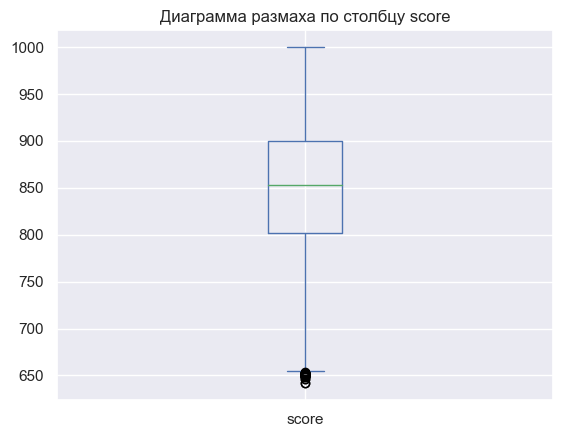

In [19]:
# строим диаграмму размаха для лучшей визуализации

df['score'].plot(kind='box', grid=True, title='Диаграмма размаха по столбцу score')
plt.show() 

Большиство значений находятся в промежутке от 802 до 900.
Есть выбросы. Не будем искажать данные и оставим выбросы без изменений. 

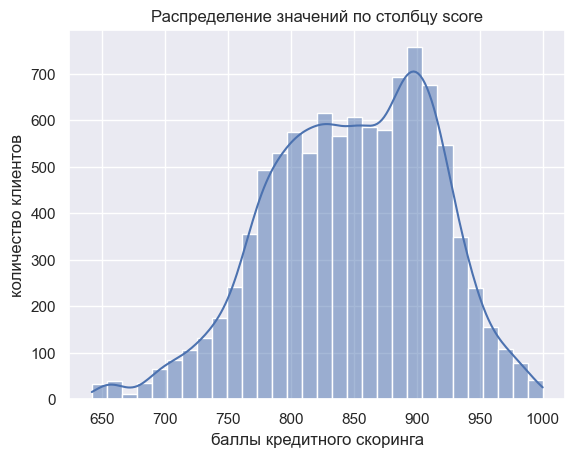

In [20]:
# посмотрим на график

sns.histplot(data=df, x='score', kde=True, bins=30).set_title('Распределение значений по столбцу score')
plt.xlabel('баллы кредитного скоринга')
plt.ylabel('количество клиентов')
plt.show()

Большинство значений находятся в диапазоне от 802 до 900. Пик приходится на значение скоринга, равное 900 баллов.
В целом по столбцу: тип данных верный, пропущенных значений нет

In [21]:
# посмотрим на распределение значений столбца city

df['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

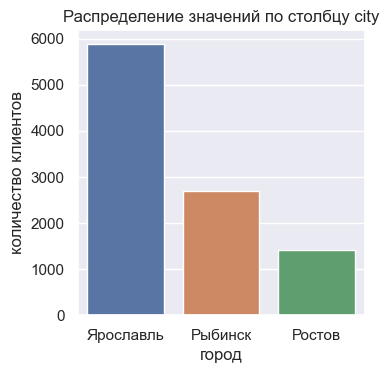

In [22]:
# построим график

sns.set(rc={'figure.figsize':(3.7,3.7)})
sns.countplot(data=df, x='city', order=df['city'].value_counts(ascending=False).index)
plt.title('Распределение значений по столбцу city')
plt.xlabel('город')
plt.ylabel('количество клиентов')
plt.show()

Больше всего клиентов в Ярославле - областном центре, что логично. Население в Рыбинске и Ростове значительно меньше.

В целом по столбцу: тип данных верный, пропущенных значений нет

In [23]:
# посмотрим на распределение значений столбца gender

df['gender'].value_counts()

М    5005
Ж    4995
Name: gender, dtype: int64

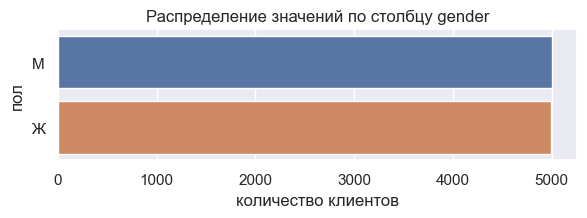

In [24]:
# построим график

sns.set(rc={'figure.figsize':(6.7,1.7)})
sns.countplot(data=df, y='gender', order=df['gender'].value_counts(ascending=False).index)
plt.title('Распределение значений по столбцу gender')
plt.xlabel('количество клиентов')
plt.ylabel('пол')
plt.show()

Примерно одинаковое количество мужчин и женщин.

В целом по столбцу: тип данных верный, пропущенных значений нет.

In [25]:
# используем метод describe()

df['age'].describe()

count    9974.000000
mean       42.734409
std        12.179971
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

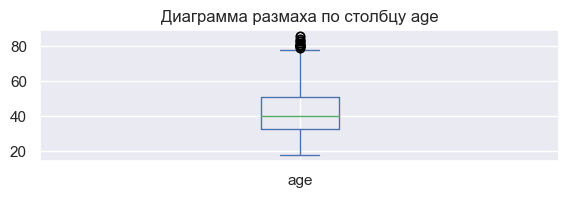

In [26]:
# строим диаграмму размаха для лучшей визуализации

df['age'].plot(kind='box', grid=True, title='Диаграмма размаха по столбцу age')
plt.show() 

Есть выбросы (скорее всего, это владельцы депозита). Данные искажать не будем, оставим выбросы без изменений. 

In [27]:
# посмотрим для большей наглядности на пропущенные значения

df['age'].isna().sum()

26

Удалим строки с пропущенным значением, т.к. возраст одна из важных составляющих портрета клиента. Потеря данных составит значительно меньше 1%

In [28]:
# удаляем строки с пропущенным значением в столбце age

df = df[df['age'].notna()]

In [29]:
# проверяем, что получилось

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   Int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   bool   
 9   last_activity  9974 non-null   bool   
 10  salary         9974 non-null   float64
 11  churn          9974 non-null   bool   
dtypes: Int64(1), bool(3), float64(3), int64(3), object(2)
memory usage: 818.2+ KB


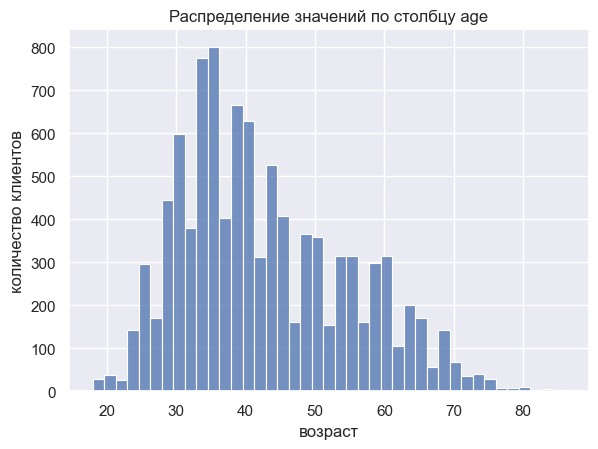

In [30]:
# посмотрим на график

sns.set(rc={'figure.figsize':(6.7,4.7)})
sns.histplot(data=df, x='age').set_title('Распределение значений по столбцу age')
plt.xlabel('возраст')
plt.ylabel('количество клиентов')
plt.show()

Большинство клиентов находятся в диапазоне от 33 до 51 года.

Минимальный возраст - 18 лет, максимальный возраст - 86 лет.

В целом по столбцу: тип данных изменили с float на int, т.к. возраст в датасете указан целочисленным, пропущенные значения - 26 строк, что значительно меньше 1% - удалили.

In [31]:
# посмотрим на данные, используя другой метод

df['equity'].value_counts()

0    2576
5    1915
4    1847
3    1541
2    1051
1     773
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

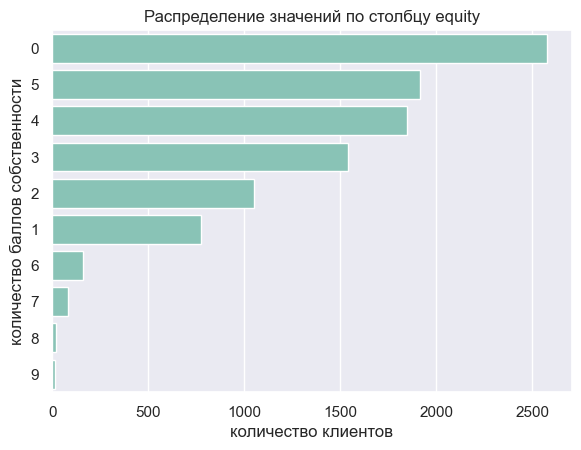

In [32]:
# построим график

sns.countplot(data=df,  palette=["#7fcdbb"], y='equity', order=df['equity']\
              .value_counts(ascending=False).index)
plt.title('Распределение значений по столбцу equity')
plt.xlabel('количество клиентов')
plt.ylabel('количество баллов собственности')
plt.show()

Большинство клиентов имеют 0, 5 и 4 балла собственности. То есть есть большая группа клиентов, у которых в собственности нет ничего, или при оформлении услуги это поле не является обязательным для заполнения (например, для владельцев депозита) и вторая группа, которые имеют балл неравный 0. Как правило, информация о собственности желательна/необходима для оформления кредитного продукта, т.к. косвенно подтверждает доход заемщика.  

В целом по столбцу: тип данных верный, пропущенных значений нет.

In [33]:
# изменим отображение экспоненциальной записи через pandas.options

pd.options.display.float_format = '{: .2f}'.format

In [34]:
# используем метод describe()

df['balance'].describe()

count         7695.00
mean        827245.59
std        1980327.41
min              0.00
25%         295698.71
50%         524295.33
75%         980051.21
max      119113552.01
Name: balance, dtype: float64

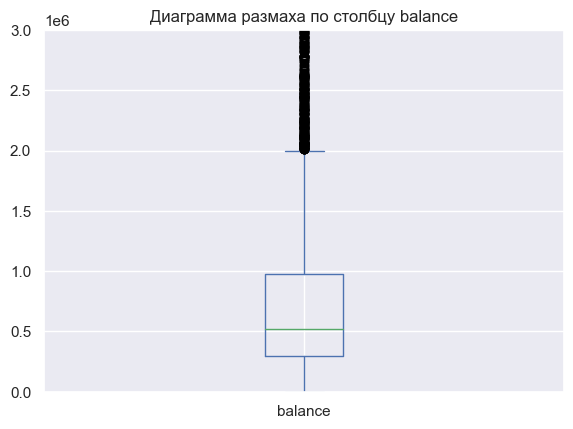

In [35]:
# строим диаграмму размаха для лучшей визуализации

df['balance'].plot(kind='box', grid=True, title='Диаграмма размаха по столбцу balance')
plt.ylim(0, 3000000)
plt.show() 

Значения больше 2 000 000 - выбросы. Оставляем без изменений, скорее всего, это премиальные клиенты банка.
Чтобы убедиться, что в данных нет ошибки можно проверить несколько клиентов с большими суммами на балансе в программе по user_id.

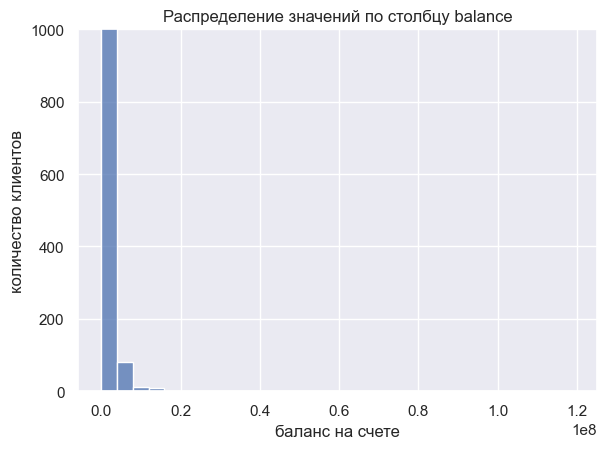

In [36]:
# посмотрим на график

sns.histplot(data=df, x='balance', bins=30).set_title('Распределение значений по столбцу balance')
plt.xlabel('баланс на счете')
plt.ylabel('количество клиентов')
plt.ylim(0,1000)
plt.show()

Исходя из графика можно сделать вывод, что есть определенная группа клиентов с большими суммами на счете. Судя по всему, это владельцы депозита. 

Большинство значений находятся в диапазоне от 295 до 980 тыс

В целом по столбцу: тип данных верный, пропущенных значений более 20%. Оставляем без изменений, т.к. нет логичной замены.  Предполагаю, что причина пропусков - техническая ошибка.

In [37]:
# посмотрим детальнее на данные с пропуском в ячейке balance

df_balance_nan = df.loc[df['balance'].isnull()]
df_balance_nan

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False
9,133130,906.00,Ярославль,Ж,67,0,NaN,1,False,True,238055.53,False
10,148929,927.00,Ростов,М,52,0,NaN,1,True,True,196820.07,False
11,172184,921.00,Ростов,М,41,0,NaN,1,True,True,217469.48,False
19,127034,922.00,Рыбинск,Ж,53,0,NaN,1,False,False,147094.82,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.00,Ростов,М,38,0,NaN,1,False,False,171763.69,False
9984,125941,729.00,Ярославль,Ж,42,0,NaN,1,True,True,687538.70,False
9993,219924,884.00,Рыбинск,Ж,36,0,NaN,1,True,True,169844.88,False
9996,139170,894.00,Ярославль,М,46,0,NaN,1,True,False,196898.29,False


In [38]:
# посмотрим, как распределены пропуски по городам

df_balance_nan['city'].value_counts()

Ярославль    1458
Рыбинск       586
Ростов        235
Name: city, dtype: int64

64% всех пропусков данных в Ярославле. Возможно, произошла техническая ошибка (например, при выгрузке базы).

In [39]:
# посмотрим на распределение значений столбца products

df['products'].value_counts()

2    5119
1    3323
3    1038
4     474
5      19
0       1
Name: products, dtype: int64

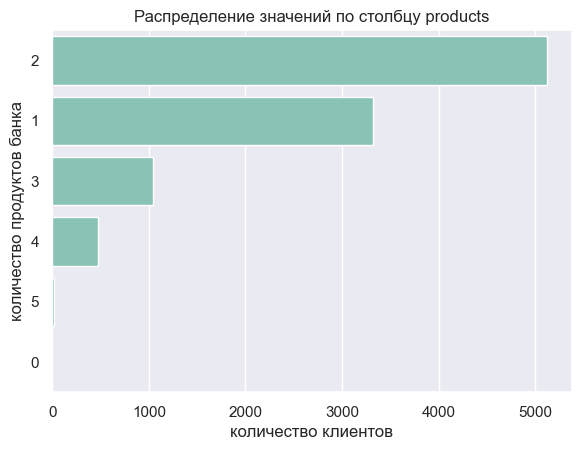

In [40]:
# построим график

sns.countplot(data=df,  palette=["#7fcdbb"], y='products', order=df['products']\
              .value_counts(ascending=False).index)
plt.title('Распределение значений по столбцу products')
plt.xlabel('количество клиентов')
plt.ylabel('количество продуктов банка')
plt.show()

Большинсиво клиентов имеют 2 или 1 продукт банка, клиентов у которы 3 и более продуктов значительно меньше.


В целом по столбцу: тип данных верный, пропущенных значений нет.

In [41]:
# посмотрим на распределение значений столбца credit_card

df['credit_card'].value_counts()

True     6784
False    3190
Name: credit_card, dtype: int64

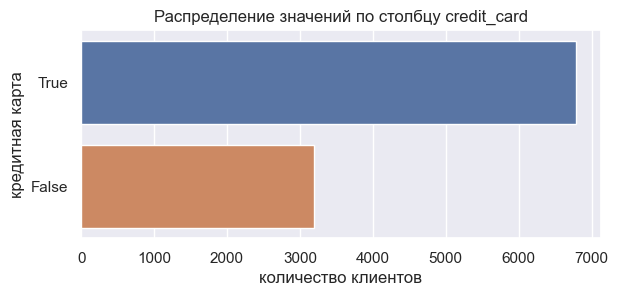

In [42]:
# построим график

sns.set(rc={'figure.figsize':(6.7,2.7)})
sns.countplot(data=df, y='credit_card', order=df['credit_card'].value_counts(ascending=False).index)
plt.title('Распределение значений по столбцу credit_card')
plt.xlabel('количество клиентов')
plt.ylabel('кредитная карта')
plt.show()

Исходя из графика, кредитная карта довольно популярный продукт среди клиентов банка.

В целом по столбцу: тип данных изменили с int на boolean, пропущенных значений нет.

In [43]:
# посмотрим на распределение значений столбца last_activity

df['last_activity'].value_counts()

True     5215
False    4759
Name: last_activity, dtype: int64

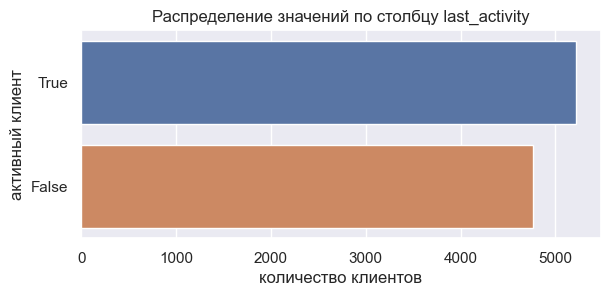

In [44]:
# построим график

sns.set(rc={'figure.figsize':(6.7,2.7)})
sns.countplot(data=df, y='last_activity', order=df['last_activity'].value_counts(ascending=False).index)
plt.title('Распределение значений по столбцу last_activity')
plt.xlabel('количество клиентов')
plt.ylabel('активный клиент')
plt.show()

Исходя из графика, кличество активных клиентов чуть больше, чем неактивных. Хорошо это или плохо, затрудняюсь с ответом, т.к. отсутствует информация за какой период предоставлена информация.

В целом по столбцу: тип данных изменили с int на boolean, пропущенных значений нет.

In [45]:
# используем метод describe()

df['salary'].describe()

count       9974.00
mean      147786.81
std       139285.51
min         2546.30
25%        75251.66
50%       119626.79
75%       174499.81
max      1395064.45
Name: salary, dtype: float64

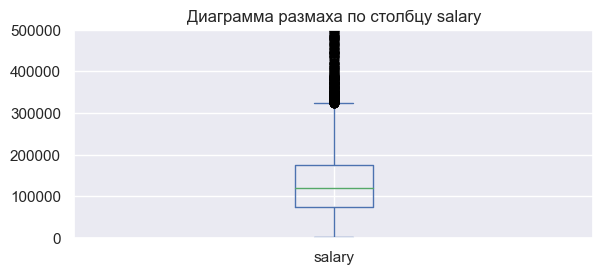

In [46]:
# строим диаграмму размаха для лучшей визуализации

df['salary'].plot(kind='box', grid=True, title='Диаграмма размаха по столбцу salary')
plt.ylim(0, 500000)
plt.show() 

Есть достаточное большое количество выбросов (заработная плата более 300 тыс).
Чтобы убедиться, что в данных нет ошибки можно проверить несколько клиентов с большими суммами заработной платы в программе по user_id.

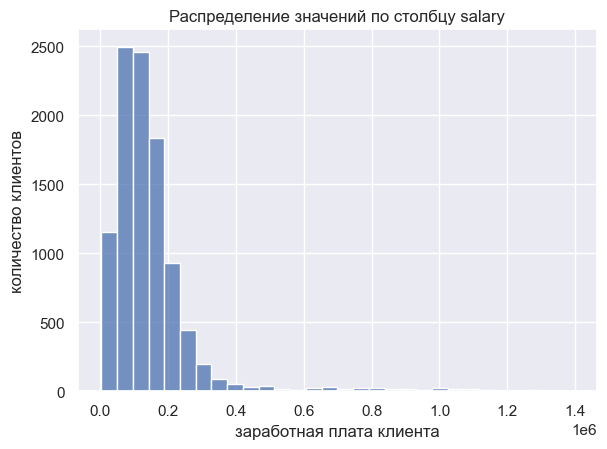

In [47]:
# посмотрим на график

sns.set(rc={'figure.figsize':(6.7,4.7)})
sns.histplot(data=df, x='salary', bins=30).set_title('Распределение значений по столбцу salary')
plt.xlabel('заработная плата клиента')
plt.ylabel('количество клиентов')
plt.show()

Большинство значений находятся в диапазоне от 75 до 174 тыс. 
По данным сайта https://gorodrabot.ru/salary?l=ярославская+область средняя заработная плата в Ярославской области за полные месяцы 2023 года составила 51 тыс. руб. (медианная 34 тыс.) Исходя из этого, доходы клиентов банка можно отнести к категории "выше среднего".

В целом по столбцу: тип данных верный, пропущенных значений нет.

In [48]:
# посмотрим на распределение значений столбца churn

df['churn'].value_counts()

False    8155
True     1819
Name: churn, dtype: int64

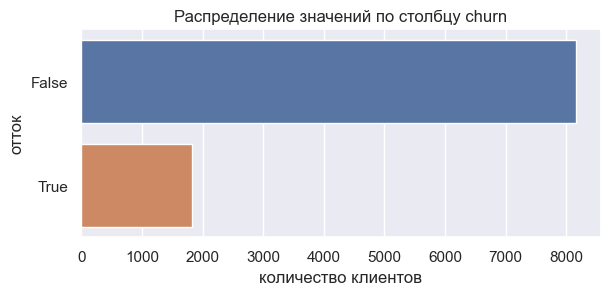

In [49]:
# построим график

sns.set(rc={'figure.figsize':(6.7,2.7)})
sns.countplot(data=df, y='churn', order=df['churn'].value_counts(ascending=False).index)
plt.title('Распределение значений по столбцу churn')
plt.xlabel('количество клиентов')
plt.ylabel('отток')
plt.show()

Исходя из графика, кличество ушедших клиентов 18.2%. Хорошо это или плохо, затрудняюсь с ответом, т.к. отсутствует информация за какой период предоставлена информация.

В целом по столбцу: тип данных изменили с int на boolean, пропущенных значений нет.

**Вывод**

На что хотелось бы обратить внимание:
1. Большинство значений скоринговых баллов находятся в диапазоне от 802 до 900, т.е. приближено к максимуму (1000 баллов).
2. Больше всего клиентов в Ярославле - областном центре, что логично. Население в Рыбинске и Ростове значительно меньше.
3. Примерно одинаковое количество мужчин и женщин.
4. Большинство клиентов находятся в диапазоне от 33 до 51 года. Минимальный возраст - 18 лет, максимальный возраст - 86 лет.
5. Большинство клиентов имеют 0, 5 и 4 балла собственности. То есть есть большая группа клиентов, у которых в собственности нет ничего, или при оформлении услуги это поле не является обязательным для заполнения (например, для владельцев депозита) и вторая группа, которые имеют балл неравный 0.
6. Большинство значений баланса счета находятся в диапазоне от 295 до 980 тыс. Есть определенная группа клиентов с большими суммами на счете. Судя по всему, это владельцы депозита.
7. Большинсиво клиентов имеют 2 или 1 продукт банка, клиентов у которы 3 и более продуктов значительно меньше.
8. Кредитная карта довольно популярный продукт среди клиентов банка (есть у 68% клиентов)
9. Количество активных клиентов чуть больше (52%), чем неактивных (48%). Хорошо это или плохо, затрудняюсь с ответом, т.к. отсутствует информация за какой период предоставлена информация.
10. Большинство значений размера заработной платы клиентов находятся в диапазоне от 75 до 174 тыс. 
По данным сайта https://gorodrabot.ru/salary?l=ярославская+область средняя заработная плата в Ярославской области за полные месяцы 2023 года составила 51 тыс. руб. (медианная 34 тыс.) Исходя из этого, доходы клиентов банка можно отнести к категории "выше среднего".
11. Количество ушедших клиентов 18.2%. Хорошо это или плохо, затрудняюсь с ответом, т.к. отсутствует информация за какой период предоставлена информация.

В исследуемых данных было выявлено 73 дубликата user_id. Предполагаю, что задвоения появились вследствии технической ошибки (например, при выгрузке базы)

Также в исследуемых данных есть аномально большие значения в столбце баланс и заработная плата.
Чтобы убедиться, что в данных нет ошибки можно проверить несколько клиентов с большими суммами заработной платы/ большим балансом на счете в программе по user_id.

В целом по данным: пропущенные значения были в столбце age (26 строк были удалены) и в столбце balance 2279 строк (64% всех пропусков в Ярославле. Возможно, произошла техническая ошибка (например, при выгрузке базы). Пропущенные значения оставлены без изменений, т.к. нет логичной замены), типы данных изменены в столбце age, credit_card, last_activity, churn, выбросы не удаляли, чтобы не искажать данные.

#### Категоризация, исследование в разрезе действующих и ушедших клиентов

##### score

Разделим данные в столбце score на категории. За основу берем деление на квартили, также обращаем внимание, чтобы размеры категорий были примерно одинаковые.

In [50]:
# создадим столбец с категориями баллов кредитного скоринга

def categorize_score(score):
    try:
        if 640 <= score <= 802:
            return 'D'
        elif 803 <= score <= 850:
            return 'C'
        elif 851 <= score <= 900:
            return 'B'
        elif score >= 901:
            return 'A'
    except:
        pass
    

In [51]:
df['score_category'] = df['score'].apply(categorize_score)

In [52]:
# сгруппируем данные 

df.groupby('score_category')['churn'].agg(['count','mean'])

,count,mean
score_category,,
A,2420,0.18
B,2670,0.26
C,2365,0.19
D,2519,0.09


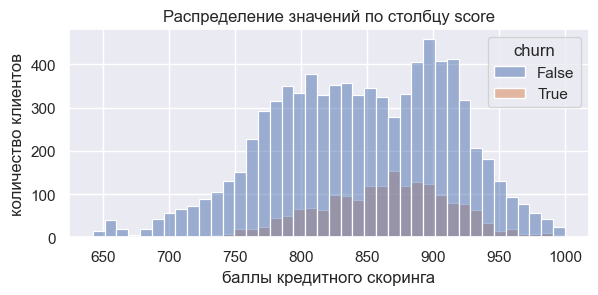

In [53]:
# посмотрим на график баллов кредитного скоринга у существующих и ушедших клиентов

sns.histplot(data=df, x='score',  hue = 'churn').set_title('Распределение значений по столбцу score')
plt.xlabel('баллы кредитного скоринга')
plt.ylabel('количество клиентов')
plt.show()

Наибольший отток у клиентов со скоринговым баллом от 851 до 900, наименьший отток у клиентов со скоринговым баллом до 802.

##### city

In [54]:
df.groupby('city')['churn'].agg('mean')

city
Ростов       0.19
Рыбинск      0.16
Ярославль    0.19
Name: churn, dtype: float64

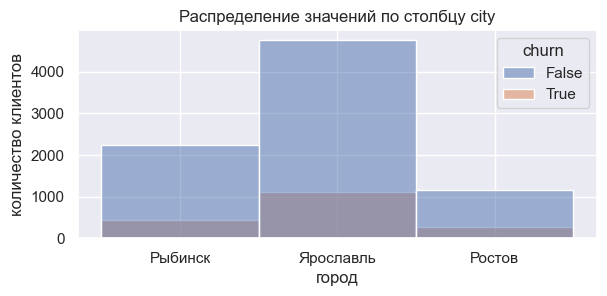

In [55]:
# посмотрим на распределение по городам у существующих и ушедших клиентов

sns.histplot(data=df, x='city',  hue = 'churn').set_title('Распределение значений по столбцу city')
plt.xlabel('город')
plt.ylabel('количество клиентов')
plt.show()

Наибольший отток в городах Ростов и Ярославль, наименьший в Рыбинске

In [56]:
pd.get_dummies(df, columns=['gender'], drop_first=False, prefix=['column1'])

,user_id,score,city,age,equity,balance,products,credit_card,last_activity,salary,churn,score_category,column1_Ж,column1_М
0,183012,850.00,Рыбинск,25,1,59214.82,2,False,True,75719.14,True,C,1,0
1,146556,861.00,Рыбинск,37,5,850594.33,3,True,False,86621.77,False,B,1,0
2,120722,892.00,Рыбинск,30,0,NaN,1,True,True,107683.34,False,B,1,0
3,225363,866.00,Ярославль,51,5,1524746.26,2,False,True,174423.53,True,B,1,0
4,157978,730.00,Ярославль,34,5,174.00,1,True,False,67353.16,True,D,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,27,1,78144.65,1,False,True,18943.64,False,C,0,1
9996,139170,894.00,Ярославль,46,0,NaN,1,True,False,196898.29,False,B,0,1
9997,115639,903.00,Ярославль,24,0,NaN,2,True,True,108905.09,False,A,0,1
9998,148700,777.00,Ярославль,68,3,865457.97,3,False,True,86874.90,False,D,1,0


In [57]:
# закодируем категориальную переменную для последующего использования библтотеки phik

pd.get_dummies(df, columns=['city'], drop_first=False, prefix=['column1'])

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,score_category,column1_Ростов,column1_Рыбинск,column1_Ярославль
0,183012,850.00,Ж,25,1,59214.82,2,False,True,75719.14,True,C,0,1,0
1,146556,861.00,Ж,37,5,850594.33,3,True,False,86621.77,False,B,0,1,0
2,120722,892.00,Ж,30,0,NaN,1,True,True,107683.34,False,B,0,1,0
3,225363,866.00,Ж,51,5,1524746.26,2,False,True,174423.53,True,B,0,0,1
4,157978,730.00,М,34,5,174.00,1,True,False,67353.16,True,D,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,М,27,1,78144.65,1,False,True,18943.64,False,C,0,1,0
9996,139170,894.00,М,46,0,NaN,1,True,False,196898.29,False,B,0,0,1
9997,115639,903.00,М,24,0,NaN,2,True,True,108905.09,False,A,0,0,1
9998,148700,777.00,Ж,68,3,865457.97,3,False,True,86874.90,False,D,0,0,1


##### gender

In [58]:
df.groupby('gender')['churn'].agg('mean')

gender
Ж    0.13
М    0.24
Name: churn, dtype: float64

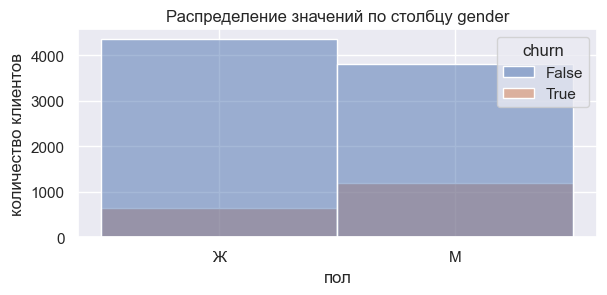

In [59]:
# посмотрим на распределение по полу у существующих и ушедших клиентов

sns.histplot(data=df, x='gender',  hue = 'churn').set_title('Распределение значений по столбцу gender')
plt.xlabel('пол')
plt.ylabel('количество клиентов')
plt.show()

Среди мужчин отток почти в 2 раза выше, чем среди женщин.

In [60]:
# подготовим данные для матрицы корреляции

df['gender_new'] = df['gender'].map({'М': 1, 'Ж': 0})

##### age

Разделим данные в столбце age на категории. За основу берем деление на квартили, также обращаем внимание, чтобы размеры категорий были примерно одинаковые.

In [61]:
# создадим столбец с категориями по возрасту

def categorize_age(age):
    try:
        if 18 <= age <= 30:
            return 'F'
        elif 31 <= age <= 35:
            return 'E'
        elif 36 <= age <= 40:
            return 'D'
        elif 41 <= age <= 50:
            return 'C'
        elif 51 <= age <= 60:
            return 'B'
        elif age >= 61:
            return 'A'
    except:
        pass

In [62]:
df['age_category'] = df['age'].apply(categorize_age)

In [63]:
# сгруппируем данные

df.groupby('age_category')['churn'].agg(['count', 'mean'])

,count,mean
age_category,,
A,1033,0.06
B,1578,0.27
C,2267,0.15
D,1805,0.16
E,1868,0.20
F,1423,0.22


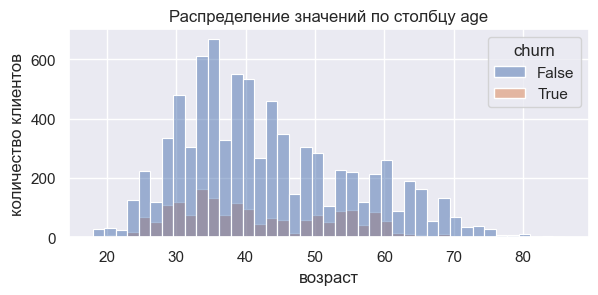

In [64]:
# посмотрим на график распределения возраста у существующих и ушедших клиентов

sns.histplot(data=df, x='age',  hue = 'churn').set_title('Распределение значений по столбцу age')
plt.xlabel('возраст')
plt.ylabel('количество клиентов')
plt.show()

Наибольший отток у клиентов в возрасте от 51 до 60 и от 18 до 30 лет, наименьший отток у клиентов, которым более 61 года.

##### equity

In [65]:
# сгруппируем данные по количеству баллов собственности

df.groupby('equity')['churn'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
equity,,
9,13,0.54
7,80,0.46
6,161,0.36
8,17,0.35
5,1915,0.30
4,1847,0.25
3,1541,0.21
2,1051,0.16
1,773,0.12


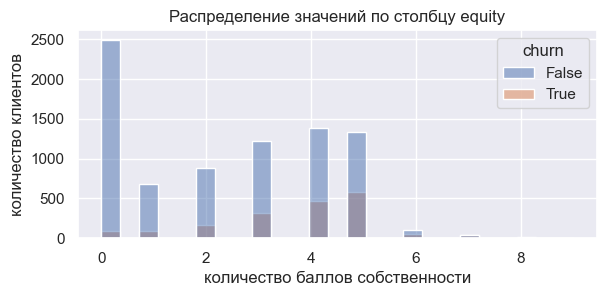

In [66]:
# посмотрим на график баллов кредитного скоринга у существующих и ушедших клиентов

sns.histplot(data=df, x='equity',  hue = 'churn').set_title('Распределение значений по столбцу equity')
plt.xlabel('количество баллов собственности')
plt.ylabel('количество клиентов')
plt.show()

Исходя из группировки и графика можно сделать вывод, чем больше у клиентов балл собственности, тем выше отток. Судя по всему, уходят состоятельные клиенты.

##### balance

Разделим данные в столбце balance на категории. За основу берем деление на квартили, также обращаем внимание, чтобы размеры категорий были примерно одинаковые.

In [67]:
# создадим столбец с категориями баланса на счету

def categorize_balance(balance):
    try:
        if 0 <= balance <= 300000:
            return 'E'
        elif 300001 <= balance <= 500000:
            return 'D'
        elif 500001 <= balance <= 980000:
            return 'C'
        elif 980001 <= balance <= 1500000:
            return 'B'
        elif  balance >= 1500001:
            return 'A'
    except:
        pass

In [68]:
df['balance_category'] = df['balance'].apply(categorize_balance)

In [69]:
# сгруппируем данные категориям баланса

df.groupby('balance_category', dropna=False)['churn'].agg(['count', 'mean'])

,count,mean
balance_category,,
A,719,0.50
B,1205,0.31
C,2076,0.22
D,1736,0.17
E,1959,0.16
NaN,2279,0.01


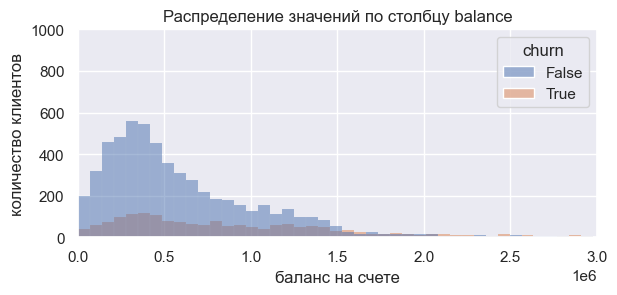

In [70]:
# посмотрим на график распределения баланса на счете у существующих и ушедших клиентов

sns.histplot(data=df, x='balance',  hue = 'churn', common_norm=False).set_title('Распределение значений по столбцу balance')
plt.xlabel('баланс на счете')
plt.ylabel('количество клиентов')
plt.ylim(0,1000)
plt.xlim(0,3000000)
plt.show()

Исходя из группировки и графика можно сделать вывод, чем больше денежных средств на счете, тем выше отток. Особенно у клиентов, баланс которых более 1,5 млн. Судя по всему, уходят состоятельные клиенты.

Исследуем более детально пропуски в столбце balance, используя сводные таблицы. 

In [71]:
# посмотрим на сводную таблицу

df.pivot_table(index='products', columns='city', values='balance', aggfunc=lambda row: row.isna().mean())

city,Ростов,Рыбинск,Ярославль
products,,,
0,NaN,1.00,NaN
1,0.45,0.56,0.62
2,0.04,0.06,0.07
3,0.02,0.04,0.03
4,0.00,0.00,0.00
5,0.00,0.00,0.00


Как видим, на этой сводной таблице Nan у клиентов, у которых нет продуктов банка.

In [72]:
# посмотрим на сводную таблицу

df.pivot_table(index='products', columns='score_category', values='balance', aggfunc=lambda row: row.isna().mean())

score_category,A,B,C,D
products,,,,
0,1.00,NaN,NaN,NaN
1,0.84,0.58,0.04,0.52
2,0.17,0.05,0.00,0.06
3,0.09,0.01,0.00,0.03
4,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,NaN


Как видим, на этой сводной таблице Nan у клиентов, у которых нет продуктов банка и у клиентов с 5-ю кредитными продуктами.

In [73]:
# посмотрим на сводную таблицу

df.pivot_table(index='equity', columns='score_category', values='balance', aggfunc=lambda row: row.isna().mean())

score_category,A,B,C,D
equity,,,,
0,0.97,0.93,0.13,0.71
1,0.61,0.11,0.00,0.09
2,0.00,0.00,0.00,0.00
3,0.01,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,NaN


Как видим, на этой сводной таблице Nan у клиентов со скоринговым баллом группы D (640-802 балла), при этом наибольшее количество баллов собственности 8 и 9.

In [74]:
# посмотрим на сводную таблицу

df.pivot_table(index='products', columns='gender', values='balance', aggfunc=lambda row: row.isna().mean())

gender,Ж,М
products,,
0,1.00,NaN
1,0.56,0.60
2,0.05,0.07
3,0.01,0.05
4,0.00,0.00
5,0.00,0.00


Как видим, на этой сводной таблице Nan у мужчин, у которых нет кредитных продуктов

In [75]:
# посмотрим на сводную таблицу

df.pivot_table(index='products', columns='age_category', values='balance', aggfunc=lambda row: row.isna().mean())

age_category,A,B,C,D,E,F
products,,,,,,
0,1.00,NaN,NaN,NaN,NaN,NaN
1,0.57,0.56,0.58,0.58,0.58,0.60
2,0.05,0.07,0.06,0.07,0.07,0.05
3,0.01,0.04,0.03,0.02,0.05,0.03
4,0.00,0.00,0.00,0.00,0.00,0.00
5,NaN,0.00,0.00,0.00,0.00,0.00


Как видим, на этой сводной таблице Nan у почти всех возрастных категорий (кроме А: тех кому 61 год и более) опять же у клиентов, у которых нет кредитных продуктов. В возрастной категории А отсутствует инфо о баланке у тех, кто пользуется 5-ю продуктами и более.

In [76]:
# посмотрим на сводную таблицу

df.pivot_table(index='credit_card', columns='products', values='balance', aggfunc=lambda row: row.isna().mean())

products,0,1,2,3,4,5
credit_card,,,,,,
False,1.00,0.77,0.03,0.02,0.00,NaN
True,NaN,0.55,0.08,0.04,0.00,0.00


Как видим на этой сводной таблице, отсутствующие значения у тех, кто пользуется кредитной картой и нет кредитных продуктов, что очень странно. Кредитная карта есть, а количество кредитных продуктов отмечено 0. Вторая группа это не пользуются кредитной картой и более 5 банковских продуктов.

In [77]:
# посмотрим на сводную таблицу

df.pivot_table(index='last_activity', columns='products', values='balance', aggfunc=lambda row: row.isna().mean())

products,0,1,2,3,4,5
last_activity,,,,,,
False,1.00,0.55,0.06,0.03,0.00,0.00
True,NaN,0.61,0.06,0.02,0.00,0.00


Как видим из этой сводной таблицы, пропущенные значения у тех клиентов, у кого нет кредитных продуктов и была активность за исследуемый период.

По итогу пропущенных значений в столбце balance:
  1. Наблюдаются в основном у клиентов, у которых нет кредитных продуктов (скорее всего, техническая ошибка)
  2. Обнаружена ошибка следующего плана: отсутствующие значения у тех, кто пользуется кредитной картой и нет кредитных продуктов, что очень странно. Кредитная карта есть, а количество кредитных продуктов отмечено 0 (тоже похоже на техническую ошибку) 
  
  Есть и другие группы с пропущенными значениями, но выше перечислены наиболее явные. 

##### products

In [78]:
# сгруппируем данные по количеству продуктов банка

df.groupby('products')['churn'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
products,,
0,1,1.00
4,474,0.63
5,19,0.42
3,1038,0.29
2,5119,0.19
1,3323,0.07


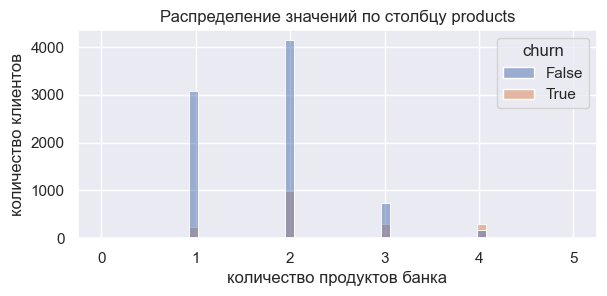

In [79]:
# посмотрим на график распределения продуктов банка в разрезе существующих и ушедших клиентов

sns.histplot(data=df, x='products',  hue = 'churn').set_title('Распределение значений по столбцу products')
plt.xlabel('количество продуктов банка')
plt.ylabel('количество клиентов')
plt.show()

Исходя из группировки и графика можно сделать вывод, наименьший отток у клиентов, которые пользуются 1-2 продуктами банка. Наибольший отток у клиентов с 4-5 продуктами банка. Возможно, стоит более детально проанализировать эти продукты. 

##### credit_card

In [80]:
# сгруппируем данные по наличию кредитной карты

df.groupby('credit_card')['churn'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
credit_card,,
False,3190,0.26
True,6784,0.15


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           9974 non-null   int64  
 1   score             9974 non-null   float64
 2   city              9974 non-null   object 
 3   gender            9974 non-null   object 
 4   age               9974 non-null   Int64  
 5   equity            9974 non-null   int64  
 6   balance           7695 non-null   float64
 7   products          9974 non-null   int64  
 8   credit_card       9974 non-null   bool   
 9   last_activity     9974 non-null   bool   
 10  salary            9974 non-null   float64
 11  churn             9974 non-null   bool   
 12  score_category    9974 non-null   object 
 13  gender_new        9974 non-null   int64  
 14  age_category      9974 non-null   object 
 15  balance_category  7695 non-null   object 
dtypes: Int64(1), bool(3), float64(3), int64(4)

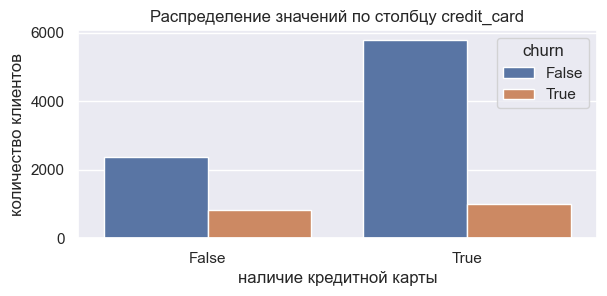

In [82]:
# посмотрим на график распределения продуктов банка в разрезе существующих и ушедших клиентов

sns.countplot(data=df, x='credit_card',  hue = 'churn').set_title('Распределение значений по столбцу credit_card')
plt.xlabel('наличие кредитной карты')
plt.ylabel('количество клиентов')
plt.show()

Отток больше у клиентов, у которых нет кредитной карты. Поэтому предполагаю, что тарифы и условия кредитной карты выгодны и удобны. 

##### last_activity

In [83]:
# сгруппируем данные по последней активности в разрезе действующих и ушедших клиентов

df.groupby('last_activity')['churn'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
last_activity,,
True,5215,0.24
False,4759,0.11


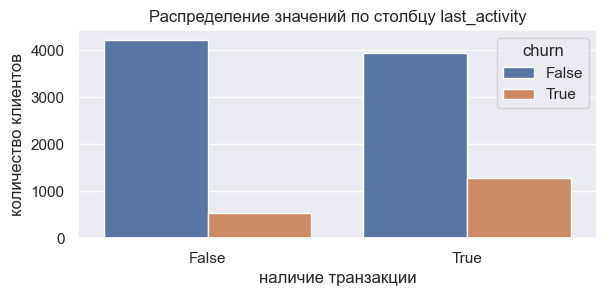

In [84]:
# посмотрим на график последней активности в разрезе существующих и ушедших клиентов

sns.countplot(data=df, x='last_activity',  hue = 'churn').set_title('Распределение значений по столбцу last_activity')
plt.xlabel('наличие транзакции')
plt.ylabel('количество клиентов')
plt.show()

Больший отток наблюдается у клиентов, у которых за исследуемый период была активность. Возможно, стоит обратить внимание на недавние изменения условий по продуктам. Может быть эти изменения повлияли на решение клиентов. Возможно, стоит также зафиксировать user_id клиентов, у которых не было активности, чтобы спустя некоторое время проверить их действия.   

##### salary

Разделим данные в столбце salary на категории. За основу берем деление на квартили, также обращаем внимание, чтобы размеры категорий были примерно одинаковые.

In [85]:
# создадим столбец с категориями по размеру заработной платы

def categorize_salary(salary):
    try:
        if 0 <= salary <= 75000:
            return 'D'
        elif 75001 <= salary <= 125000:
            return 'C'
        elif 125001 <= salary <= 174000:
            return 'B'
        elif  salary >= 174001:
            return 'A'
    except:
        pass

In [86]:
df['salary_category'] = df['salary'].apply(categorize_salary)

In [87]:
# сгруппируем данные по размеру заработной платы клиентов

df.groupby('salary_category')['churn'].agg(['count', 'mean'])

,count,mean
salary_category,,
A,2515,0.19
B,2205,0.20
C,2774,0.20
D,2480,0.15


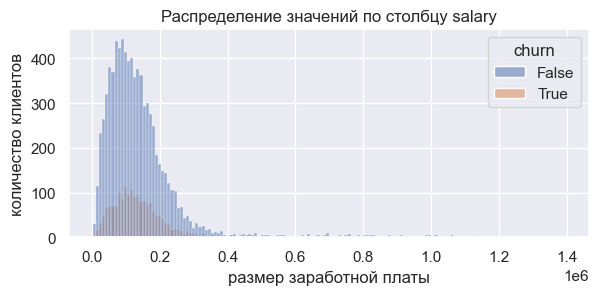

In [88]:
# посмотрим на график последней активности в разрезе существующих и ушедших клиентов

sns.histplot(data=df, x='salary',  hue = 'churn').set_title('Распределение значений по столбцу salary')
plt.xlabel('размер заработной платы')
plt.ylabel('количество клиентов')
plt.show()

Наименьший отток у клиентов, размер заработной платы которых до 75 тыс, у клиентов, зарплата которых более 75 тыс отток примерно одинаковый. 

##### среднестатистический портрет клиента банка

Составим портрет среднестатистического клиента, но вместо среднего используем медиану, чтобы выбросы не исказили картину.

In [89]:
df.groupby('churn').median().T

churn,False,True
user_id,173142.00,170532.00
score,848.00,866.00
age,40.00,39.00
equity,3.00,4.00
balance,475410.09,783908.90
products,2.00,2.00
credit_card,1.00,1.00
last_activity,0.00,1.00
salary,118227.60,125395.22
gender_new,0.00,1.00


Согласно вычислениям выше, банк теряет благонадежных, достаточно состоятельных, мужчин среднего возрасти (39 лет).
Клиент в исследуемый период совершал операцию, пользуется кредитной картой.

Действующий клиент банка - женщина среднего возраста (40 лет). Чуть менее состоятельная, менее благонадежная. 
За исследуемый период операций не совершала, тоже пользуется кредитной картой.

Важно помнить, что данные портреты довольно обобщенные: в наших данных человека с таким "портретом" может и не быть, а может быть так, что каждая отдельная характеристика действительно описывает нашего клиента, но все вместе, в совокупности они не встречаются. 

##### Матрица корреляции

In [90]:
# перезапишем df c учетом новых столбцов 

df = pd.get_dummies(df)

In [91]:
# выведем все столбцы датасета

df.columns

Index(['user_id', 'score', 'age', 'equity', 'balance', 'products',
       'credit_card', 'last_activity', 'salary', 'churn', 'gender_new',
       'city_Ростов', 'city_Рыбинск', 'city_Ярославль', 'gender_Ж', 'gender_М',
       'score_category_A', 'score_category_B', 'score_category_C',
       'score_category_D', 'age_category_A', 'age_category_B',
       'age_category_C', 'age_category_D', 'age_category_E', 'age_category_F',
       'balance_category_A', 'balance_category_B', 'balance_category_C',
       'balance_category_D', 'balance_category_E', 'salary_category_A',
       'salary_category_B', 'salary_category_C', 'salary_category_D'],
      dtype='object')

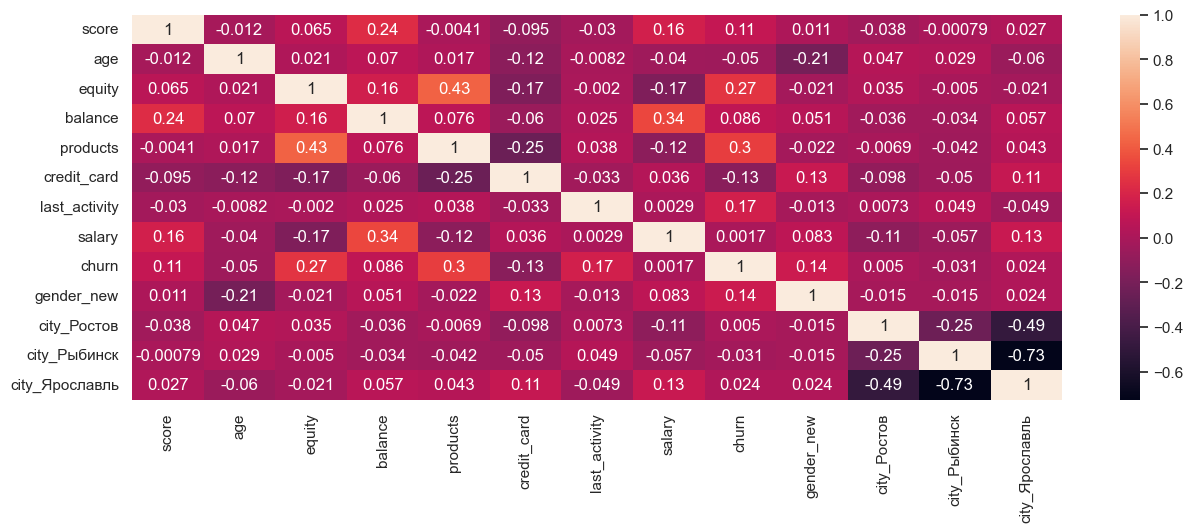

In [92]:
# построим матрицу корреляции, чтобы определить какие факторы больше всего влияют отток клиентов

fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df[['score', 'age', 'equity', 'balance', 'products',
       'credit_card', 'last_activity', 'salary', 'churn', 'gender_new',
       'city_Ростов', 'city_Рыбинск', 'city_Ярославль']].corr(), annot=True)
plt.show()

Для интерпретации коэффициентов корреляции используем шкалу Чеддока:
1. отток связан с количеством продуктов банка (0.22 очень слабая)
2. отток связан с активностью в исследуемый период (0.21 очень слабая)
3. отток связан с активностью с баллом скоринга (0.2 очень слабая)

Также мы помним, что матрица корреляции (Пирсона) показывает только линейную зависимость. Проверим нелинейную зависимость при помощи библиотеки phik.

In [93]:
# выберем основные столбцы

cols_to_keep = ['score', 'age', 'equity', 'balance', 'products',
       'credit_card', 'last_activity', 'salary', 'churn', 'gender_new',
       'city_Ростов', 'city_Рыбинск', 'city_Ярославль']

# создадим датафрейм

df_phik = df[cols_to_keep]

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'salary', 'gender_new', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль']


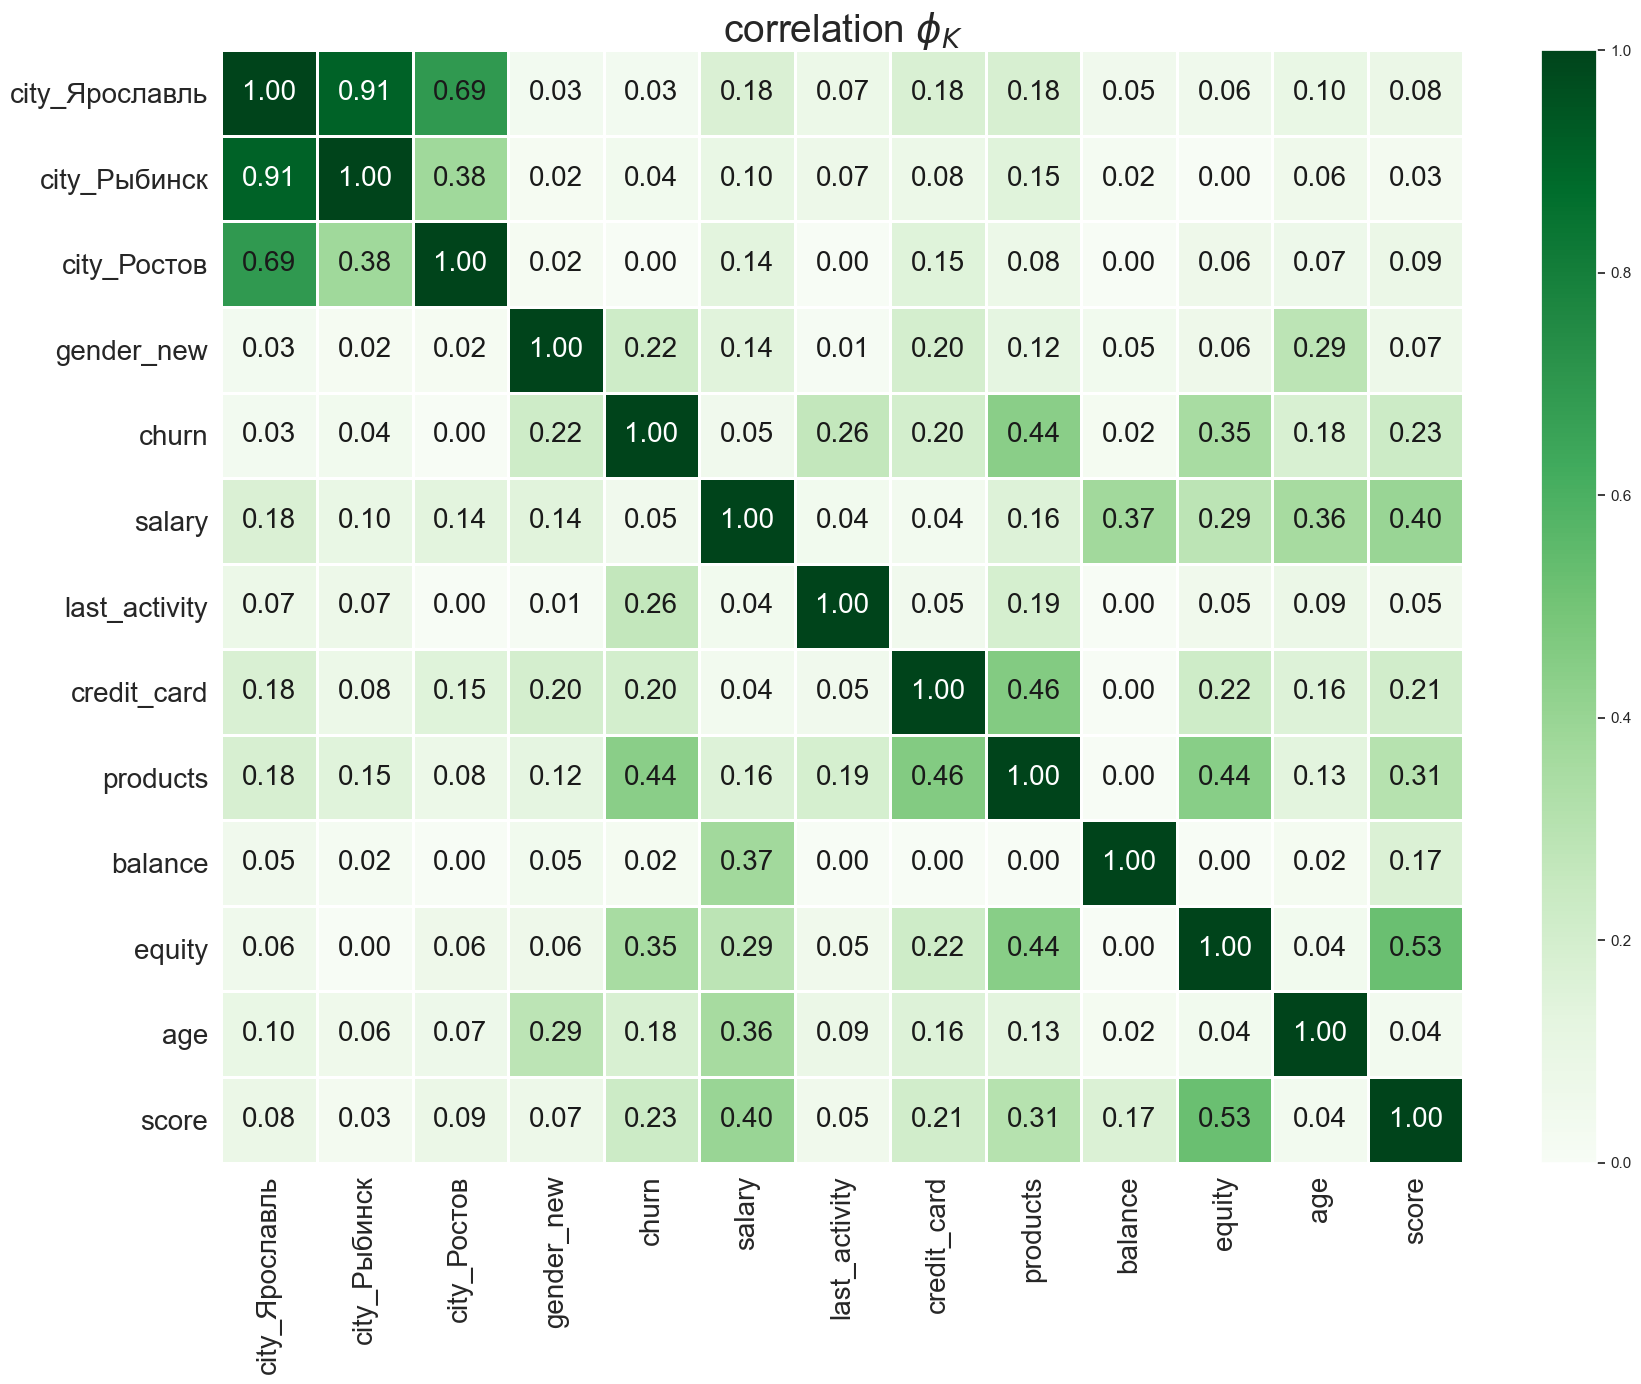

In [94]:
# строим тепловую карту для лучшей визуализации

phik_overview = df_phik.phik_matrix()
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=2, 
                        figsize=(18, 14))
plt.tight_layout()

Результаты получились примерно такие же, как и у матрицы корреляции (Пирсона):
1. отток связан с активностью в исследуемый период (0.32 слабая)
2. отток связан с баллами кредитного скоринга (0.31 слабая)
3. отток связан с полом клиента (0.22 очень слабая)

**Вывод**

На данном этапе мы провели категоризацию клиентов, исследовали каждый показатель в разрезе действующий/ушедший клиент, составили портреты действующего/ушедшего клиента, проанализировали связи при помощи матрицы корреляции и библиотеки phik.

Описание ушедшего клиента:
1. Балл скоринга: 851-900 баллов
2. Город: Ярославль, Ростов
3. Пол: мужчина
4. Возраст: 18-30 лет, 51-60 лет
5. Количество баллов собственности: 4-5 и более
6. Баланс на счете: более 980 тыс
7. Количество банковских продуктов: 3-4 продукта
8. Наличие кредитной карты: нет 
9. Наличие транзакции за исследуемый период: да
10. Заработная плата клиента: 75 тыс. - 174 тыс

Описание действующего клиента:
1. Балл скоринга: 640-802 балла
2. Город: Рыбинск
3. Пол: женщина
4. Возраст: более 61 года, 41-50 лет
5. Количество баллов собственности: 0, 1 балл
6. Баланс на счете: до 300 тыс, до 500 тыс
7. Количество банковских продуктов: 1-2 продукта
8. Наличие кредитной карты: да
9. Наличие транзакции за исследуемый период: нет
10. Заработная плата клиента: менее 75 тыс

Важно помнить, что данные портреты довольно обобщенные: в наших данных человека с таким "портретом" может и не быть, а может быть так, что каждая отдельная характеристика действительно описывает нашего клиента, но все вместе, в совокупности они не встречаются. 

Хотелось бы обратить внимание на следующее:
1. Склонны уходить состоятельные клиенты:
- чем больше у клиентов балл собственности, тем выше отток
- чем больше денежных средств на счете, тем выше отток. Особенно у клиентов, баланс которых более 1,5 млн.
2. Наименьший отток у клиентов, которые пользуются 1-2 продуктами банка. Наибольший отток у клиентов с 4-5 продуктами банка. Возможно, стоит более детально проанализировать эти продукты, условия, тарифы.
3. Больший отток наблюдается у клиентов, у которых за исследуемый период была активность. Возможно, стоит обратить внимание на недавние изменения условий по продуктам. Может быть эти изменения повлияли на решение клиентов. На мой взгляд, стоит также зафиксировать user_id клиентов, у которых не было активности за исследуемый период, чтобы спустя некоторое время проверить их действия.  
4. Отток больше у клиентов, у которых нет кредитной карты. Поэтому предполагаю, что тарифы и условия кредитной карты выгодны и удобны. 

### Проверка статитстических гипотез

#### Проверка гипотезы: средний доход действующих и ушедших клиентов одинаковые

Cформулируем нулевую и альтернативную гипотезы, определим alpha:

H_0: Средний доход действующих клиентов = средний доход ушедших клиентов

H_a: Средний доход действующих клиентов ≠ средний доход ушедших клиентов

alpha = 0.05

Критерий значимости определяет насколько критично для нас ошибиться, т.е. насколько значима для нас цена ошибки. В нашем случае можно было выбрать любой уровень значимости: 0.05 или 0.01. Цена вопроса - корректно определить суть проблемы, ведь это немалые деньги и лучше не ошибаться.

t-тест мы можем использовать при условии:
1. Генеральные совокупности не должны зависеть друг от друга
2. Выборочные средние должны быть нормально распределены (но это условие не препятствие)
3. Дисперсии рассматриваемых генеральных совокупностей должны быть равны.
Если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные, указываем equal_var= False при вызове метода scipy.stats.ttest_ind().

В нашем случае мы можем использовать t-тест.

In [95]:
# разделим датасет на две выборки: действующие и ушедшие клиенты 

df_churn_0 = df[df['churn'] == 0]
df_churn_1 = df[df['churn'] == 1]

In [96]:
# выделим сравниваемый показатель в обеих выборках

sample_1 = df_churn_0['salary']
sample_2 = df_churn_1['salary']

In [97]:
sample_1 = df_churn_0['salary']
sample_2 = df_churn_1['salary']


results = st.ttest_ind(
    sample_1, 
    sample_2, equal_var = False)

alpha = .05

print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.8515799588935961
Не получилось отвергнуть нулевую гипотезу


Таким образом, получается, что средний доход у ушедших и действующих клиентов одинаковый. 

#### Проверка гипотезы: средний баланс счета действующих и ушедших клиентов одинаковые

Cформулируем нулевую и альтернативную гипотезы, определим alpha:

H_0: Средний баланс счета действующих клиентов = средний баланс счета ушедших клиентов

H_a: Средний баланс счета действующих клиентов ≠ средний баланс счета ушедших клиентов

alpha = 0.05

Во втором случае мы также можем использовать t-тест.

In [98]:
# удаляем строки с пропущенным значением в столбце balance

df = df[df['balance'].notna()]

In [99]:
# разделим датасет на две выборки: действующие и ушедшие клиенты 

df_churn_0 = df[df['churn'] == 0]
df_churn_1 = df[df['churn'] == 1]

In [100]:
sample_1 = df_churn_0['balance']
sample_2 = df_churn_1['balance']


results = st.ttest_ind(
    sample_1, 
    sample_2, equal_var = False)

alpha = .05

print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.7317408579113568e-13
Отвергаем нулевую гипотезу


Таким образом, получается, что средний баланс счета у ушедших и действующих клиентов разный. 

### Итоговый вывод и рекомендации

По итогу проведенного исследования хотелось бы обратить внимание на следующее:
1. Склонны уходить состоятельные клиенты:
- чем больше у клиентов балл собственности, тем выше отток
- чем больше денежных средств на счете, тем выше отток. Особенно у клиентов, баланс которых более 1,5 млн.
2. Наименьший отток у клиентов, которые пользуются 1-2 продуктами банка. Наибольший отток у клиентов с 4-5 продуктами банка. Возможно, причину сможем найти, более детально проанализировав эти продукты, условия, тарифы.
3. Больший отток наблюдается у клиентов, у которых за исследуемый период была активность. Возможно, стоит обратить внимание на недавние изменения условий по продуктам. Возможная причина - эти изменения повлияли на решение клиентов уйти. На мой взгляд, стоит также зафиксировать user_id клиентов, у которых не было активности за исследуемый период, чтобы спустя некоторое время проверить их действия.  
4. Отток больше у клиентов, у которых нет кредитной карты. Поэтому предполагаю, что тарифы и условия кредитной карты выгодны и удобны. 
5. Кроме того, был проведен статистический анализ с целью подтвердить два предположения:
- предположение, что средний доход действующих и ушедших клиентов одинаковый. Предположение подтвердилось.
- предположение, что средний баланс счета действующих и ушедших клиентов одинаковый. Предположение не подтвердилось.

Что касается портретов действующих и ушедших клиентов, они следующие:

Описание ушедшего клиента:
1. Балл скоринга: 851-900 баллов
2. Город: Ярославль, Ростов
3. Пол: мужчина
4. Возраст: 18-30 лет, 51-60 лет
5. Количество баллов собственности: 4-5 и более
6. Баланс на счете: более 980 тыс
7. Количество банковских продуктов: 3-4 продукта
8. Наличие кредитной карты: нет 
9. Наличие транзакции за исследуемый период: да
10. Заработная плата клиента: 75 тыс. - 174 тыс

Описание действующего клиента:
1. Балл скоринга: 640-802 балла
2. Город: Рыбинск
3. Пол: женщина
4. Возраст: более 61 года, 41-50 лет
5. Количество баллов собственности: 0, 1 балл
6. Баланс на счете: до 300 тыс, до 500 тыс
7. Количество банковских продуктов: 1-2 продукта
8. Наличие кредитной карты: да
9. Наличие транзакции за исследуемый период: нет
10. Заработная плата клиента: менее 75 тыс

Важно помнить, что данные портреты довольно обобщенные: в наших данных человека с таким "портретом" может и не быть, а может быть так, что каждая отдельная характеристика действительно описывает нашего клиента, но все вместе, в совокупности они не встречаются.

Что касается данных в целом, то:
1. Было выявлено 73 дубликата user_id. Предполагаю, что задвоения появились вследствии технической ошибки (например, при выгрузке базы)
2. Также в исследуемых данных есть аномально большие значения в столбце баланс и заработная плата.
Чтобы убедиться, что в данных нет ошибки предлагаю проверить несколько клиентов с большими суммами заработной платы/ большим балансом на счете в программном обеспечении по user_id.
3. Много пропущенных значений в столбце balance 2279 строк:
- Наблюдаются в основном у клиентов, у которых нет кредитных продуктов (скорее всего, техническая ошибка)
- Обнаружена ошибка следующего плана: отсутствующие значения у тех, кто пользуется кредитной картой и нет кредитных продуктов, что очень странно. Кредитная карта есть, а количество кредитных продуктов отмечено 0 (тоже похоже на техническую ошибку) 

В качестве возможных мер по удержанию клиентов предлагаю следующее:

1. Провести выборочный обзвон ушедших клиентов, ненавязчиво выяснив причину прекращения сотрудничества;
2. Рассмотреть возможность выделения для состоятельных/значимых клиентов персонального менеджера;
3. Рассмотреть возможность изменения тарифов/условий обслуживания для состоятельных/значимых клиентов;
4. Рассмотреть возможность создания программы лояльности для клиентов, которые пользуются 4-5 продуктами банка